# Scrape Real Estate Website and House Prices Prediction Using KNN and SVM Algorithm

## Importing libraries

In [2]:
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pylab as plt
import seaborn

## Loading input data

In [3]:
file = pandas.read_json('/Users/jingjing/Documents/Python_file/projects/knn/rew_data.json')
all_data = pandas.DataFrame(file).to_numpy().T

## Extract and clean dependent variables

In [4]:
org_y = all_data[0]
y = []
for i in range(0, len(org_y)):
    for j in range(0, len(org_y[0])):
        each = org_y[i][j]
        each = int(each.replace(',', '').replace('$', '').replace('\n', ''))
        y = numpy.append(y, each)

## Extract and clean independent variables

In [5]:
org_x = all_data[1]
x = []
for i in range(0, len(org_x)):
    for j in range(0, len(org_x[0])):
        each = org_x[i][j]
        if 'x' in each:
            each = each.replace('ft', '')
            each = each.split('x')
            each = int(each[0]) * int(each[1])
        elif '-' in each:
            each = each.replace('sf', '')
            each = each.split('-')
            each = (int(each[0]) + int(each[1]))/2
        elif '<' in each:
            each = int(each.replace('<', '').replace('sf', ''))
        x = numpy.append(x, each)

## Plot

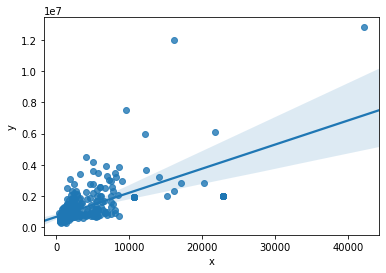

In [6]:
df = pandas.DataFrame({'x':pandas.Series(x), 'y':pandas.Series(y)})
seaborn.regplot('x', 'y', data=df)
plt.show()

## Splitting the dataset into the Training and Test set

In [7]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Loading KNN and SVM model 

In [9]:
classifier_knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean')

In [10]:
classifier_svm = SVC(kernel='linear', random_state = 0)

## Fitting model

In [11]:
classifier_knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [12]:
classifier_svm.fit(x_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Predicting the test set

In [13]:
y_pred_knn = classifier_knn.predict(x_test)

In [14]:
y_pred_svm = classifier_svm.predict(x_test)

## Evaluating model

In [15]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
#print(conf_matrix)

In [16]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

## Getting accuracy score

In [17]:
print(accuracy_score(y_test, y_pred_knn))

In [18]:
print(accuracy_score(y_test, y_pred_svm))